Sentence Length in Biblical Hebrew - Menzerath's Law

In [1]:
import sys, collections, os
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr  
import numpy as np
sns.set()
import pprint as pp
import math
from matplotlib import pyplot as plt

In [2]:
from tf.fabric import Fabric
TF = Fabric(modules='hebrew/etcbc4c')

This is Text-Fabric 4.3.0
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

108 features found and 0 ignored


Activate relevant linguistic features

In [3]:
api = TF.load('''
    otype lex language
    typ code function rela det 
    vt vs txt sp mother uvf
''')

  0.00s loading features ...
   |     0.10s B otype                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.29s B lex                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.24s B language             from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.42s B typ                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.09s B code                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.15s B function             from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.44s B rela                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.40s B det                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.23s B vt                   from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.32s B vs                   from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.08s B txt           

In [4]:
api.loadLog()
api.makeAvailableIn(globals())

   |     0.07s M otext                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.10s B otype                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     1.13s B oslots               from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.00s M otext                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.07s B book                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.03s B chapter              from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.02s B verse                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.25s B g_cons               from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.32s B g_cons_utf8          from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.27s B g_lex                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.34s B g_lex_utf8           from /Users/jAir/githu

In [68]:
sentence_list = []
sentence_dict = {}

number_clauses = []
number_phrases = []
clause_phrase_ratio = []

for sen in F.otype.s('sentence'):
    clauses = L.d(sen, 'clause')
    cl_counter = 0
    
    for cl in clauses:
        cl_counter += 1
        
    all_phrases = L.d(sen, 'phrase')
    phr_counter = 0
    
    for phr in all_phrases:  
        phr_counter += 1
        
    info_list = [str(cl)]
    
    where = T.sectionFromNode(cl)
    for elem in where:
        info_list.append(str(elem))
    words = L.d(cl, 'word')
    lang = F.language.v(words[0])
    info_list.append(lang)
    info_list.append(str(cl_counter))
    number_clauses.append(cl_counter)
    info_list.append(str(phr_counter))
    number_phrases.append(phr_counter)
    info_list.append(str(phr_counter / cl_counter))
    clause_phrase_ratio.append(phr_counter / cl_counter)
    
    sentence_list.append(cl)
    sentence_dict[cl] = info_list

In [52]:
info_list

['514581', '2_Chronicles', '36', '23', 'hbo', '1', '2', '2.0']

In [69]:
csvh = open('sentence_jarod1.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'number_clauses', 'number_phrases', 'ratio']
csvh.write('{}\n'.format(','.join(header)))
for sen in sentence_list:
    line = sentence_dict[sen]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [70]:
mez = pd.read_csv('/Users/jAir/Desktop/SBL Presentations/2018 LBH/sentence_jarod1.csv')

In [86]:
narrative = {'Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', 
             '1_Kings', '2_Kings', '1_Chronicles', '2_Chronicls', 'Ruth', 'Esther', 'Ezra', 'Nehemiah', 'Jonah', 'Daniel'}

conditions = [
    (mez['book'] == 'Genesis'),
    (mez['book'] == 'Exodus'),
    (mez['book'] == 'Leviticus'),
    (mez['book'] == 'Numbers'),
    (mez['book'] == 'Deuteronomy'),
    (mez['book'] == 'Joshua'),
    (mez['book'] == 'Judges'),
    (mez['book'] == '1_Samuel'),
    (mez['book'] == '2_Samuel'),
    (mez['book'] =='1_Kings'),
    (mez['book'] =='2_Kings'),
    (mez['book'] =='1_Chronicles'),
    (mez['book'] =='2_Chronicles'),
    (mez['book'] == 'Ruth'),
    (mez['book'] =='Esther'),
    (mez['book'] =='Ezra'),
    (mez['book'] =='Nehemiah'),
    (mez['book'] =='Jonah'),
    (mez['book'] =='Daniel')]
choices = ['Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',
          'Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',]
mez['genre'] = np.select(conditions, choices, default = 'Poetry')
mez

,id,book,chapter,verse,language,number_clauses,number_phrases,ratio,genre
0,426582,Genesis,1,1,hbo,1,4,4.000000,Narrative
1,426583,Genesis,1,2,hbo,1,4,4.000000,Narrative
2,426584,Genesis,1,2,hbo,1,3,3.000000,Narrative
3,426585,Genesis,1,2,hbo,1,4,4.000000,Narrative
4,426586,Genesis,1,3,hbo,1,3,3.000000,Narrative
5,426587,Genesis,1,3,hbo,1,2,2.000000,Narrative
6,426588,Genesis,1,3,hbo,1,3,3.000000,Narrative
7,426590,Genesis,1,4,hbo,2,6,3.000000,Narrative
8,426591,Genesis,1,4,hbo,1,4,4.000000,Narrative
9,426592,Genesis,1,5,hbo,1,5,5.000000,Narrative


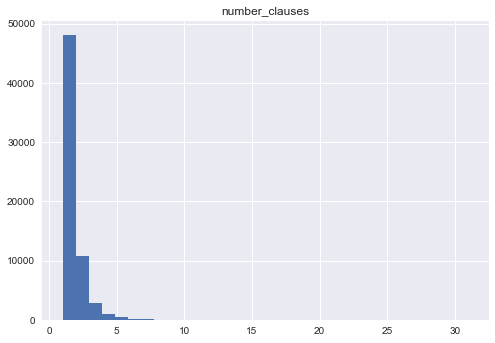

In [107]:
mez.hist(column = 'number_clauses', bins = (mez['number_clauses'].max()))
plt.show()

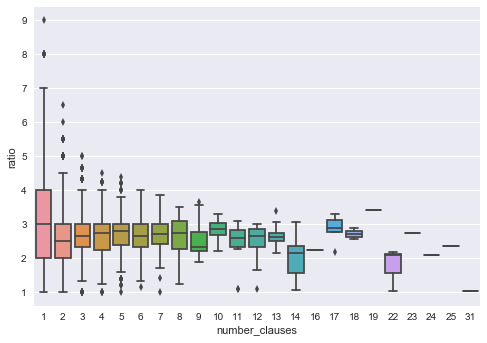

In [74]:
sns.boxplot(x='number_clauses', y='ratio', data=mez)
plt.show()

calculate Pearson correlation coefficient.

In [75]:
print(pearsonr(number_clauses,clause_phrase_ratio))

print(np.corrcoef(number_clauses,clause_phrase_ratio))

(-0.13539704319657928, 9.273172548482391e-258)
[[ 1.         -0.13539704]
 [-0.13539704  1.        ]]


Make a scatterplot of number_clauses and clause_phrase_ratio

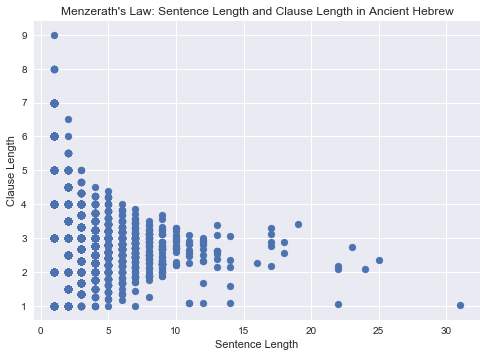

In [76]:
plt.scatter(number_clauses, clause_phrase_ratio)
plt.title("Menzerath's Law: Sentence Length and Clause Length in Ancient Hebrew")
plt.xlabel("Sentence Length")
plt.ylabel("Clause Length")
plt.show()

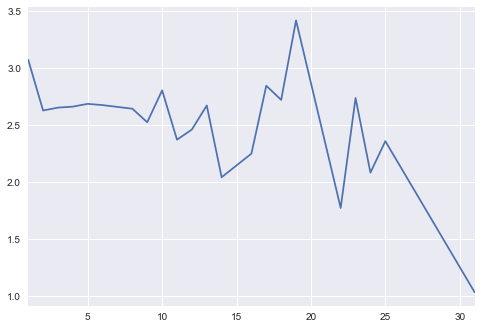

In [77]:
mez.ratio.groupby(number_clauses).mean().plot(kind='line')
plt.show()

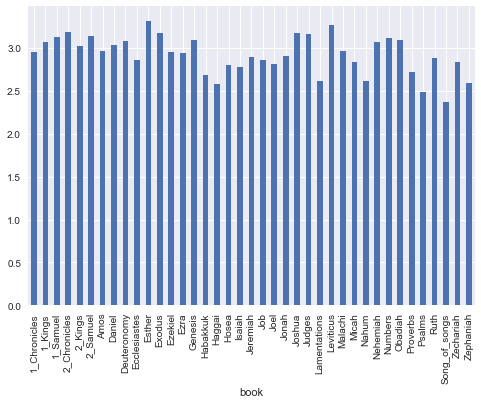

In [78]:
mez.ratio.groupby(mez.book).mean().plot(kind='bar')
plt.show()

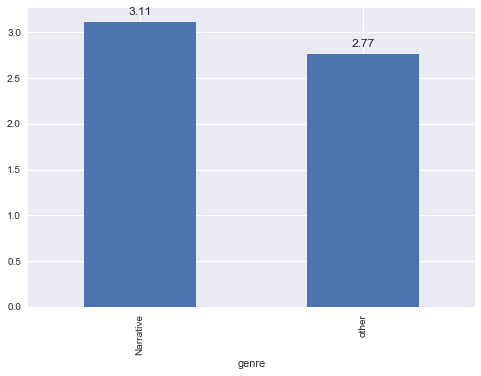

In [79]:
ax1 = mez.ratio.groupby(mez.genre).mean().plot(kind='bar')
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

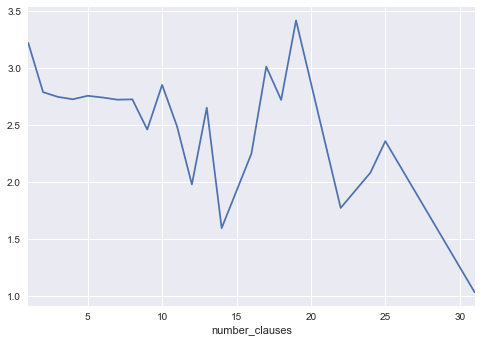

In [96]:
mez.loc[mez.genre == 'Narrative'].ratio.groupby(mez.number_clauses).mean().plot(kind='line')
plt.show()

In [90]:
print(pearsonr(mez.loc[mez.genre == 'Narrative'].number_clauses, mez.loc[mez.genre == 'Narrative'].ratio))

print(np.corrcoef(mez.loc[mez.genre == 'Narrative'].number_clauses, mez.loc[mez.genre == 'Narrative'].ratio))

(-0.15155239154856082, 8.816895607509939e-189)
[[ 1.         -0.15155239]
 [-0.15155239  1.        ]]


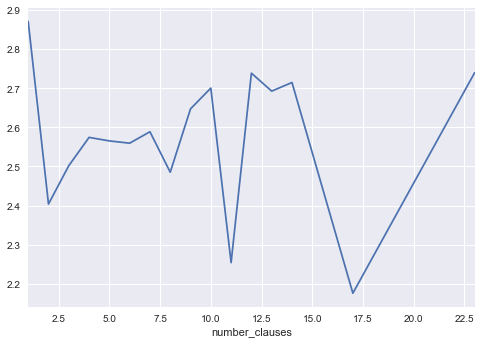

In [87]:
mez.loc[mez.genre == 'Poetry'].ratio.groupby(mez.number_clauses).mean().plot(kind='line')
plt.show()

In [92]:
print(pearsonr(mez.loc[mez.genre == 'Poetry'].number_clauses, mez.loc[mez.genre == 'Poetry'].ratio))

print(np.corrcoef(mez.loc[mez.genre == 'Poetry'].number_clauses, mez.loc[mez.genre == 'Poetry'].ratio))

(-0.12248880659603606, 1.8415160380958644e-89)
[[ 1.         -0.12248881]
 [-0.12248881  1.        ]]


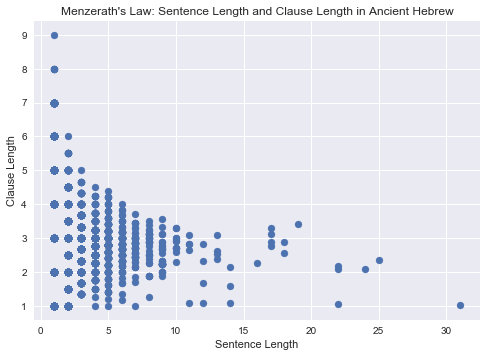

In [98]:
plt.scatter(mez.loc[mez.genre == 'Narrative'].number_clauses, mez.loc[mez.genre == 'Narrative'].ratio)
plt.title("Menzerath's Law: Sentence Length and Clause Length in Ancient Hebrew")
plt.xlabel("Sentence Length")
plt.ylabel("Clause Length")
plt.show()

Begin Clause length analysis:

In [102]:
clause_list = []
clause_dict = {}

number_phrases = []
number_words2 = []
phrase_word_ratio = []

for cl in F.otype.s('clause'):
    phrases = L.d(cl, 'phrase')
    phr_counter2 = 0
    
    for phr in phrases:
        phr_counter2 += 1
        
    all_words = L.d(cl, 'word')
    word_counter = 0
    
    for w in all_words:  
        word_counter += 1
        
    info_list2 = [str(cl)]
    
    where = T.sectionFromNode(cl)
    for elem in where:
        info_list2.append(str(elem))
    words2 = L.d(cl, 'word')
    lang2 = F.language.v(words[0])
    info_list2.append(lang2)
    info_list2.append(str(phr_counter2))
    number_phrases.append(phr_counter2)
    info_list2.append(str(word_counter))
    number_words2.append(word_counter)
    info_list2.append(str(word_counter / phr_counter2))
    phrase_word_ratio.append(word_counter / phr_counter2)

    
    clause_list.append(cl)
    clause_dict[cl] = info_list2

In [103]:
csvh = open('clause_jarod.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'number_phrases', 'number_words', 'ratio']
csvh.write('{}\n'.format(','.join(header)))
for cl in clause_list:
    line = clause_dict[cl]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [105]:
mez_c = pd.read_csv('/Users/jAir/Desktop/SBL Presentations/2018 LBH/clause_jarod.csv')

In [106]:
mez_c

,id,book,chapter,verse,language,number_phrases,number_words,ratio
0,426582,Genesis,1,1,hbo,4,11,2.750000
1,426583,Genesis,1,2,hbo,4,7,1.750000
2,426584,Genesis,1,2,hbo,3,5,1.666667
3,426585,Genesis,1,2,hbo,4,8,2.000000
4,426586,Genesis,1,3,hbo,3,3,1.000000
5,426587,Genesis,1,3,hbo,2,2,1.000000
6,426588,Genesis,1,3,hbo,3,3,1.000000
7,426589,Genesis,1,4,hbo,4,6,1.500000
8,426590,Genesis,1,4,hbo,2,2,1.000000
9,426591,Genesis,1,4,hbo,4,10,2.500000


In [119]:
narrative = {'Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', 
             '1_Kings', '2_Kings', '1_Chronicles', '2_Chronicls', 'Ruth', 'Esther', 'Ezra', 'Nehemiah', 'Jonah', 'Daniel'}

conditions = [
    (mez_c['book'] == 'Genesis'),
    (mez_c['book'] == 'Exodus'),
    (mez_c['book'] == 'Leviticus'),
    (mez_c['book'] == 'Numbers'),
    (mez_c['book'] == 'Deuteronomy'),
    (mez_c['book'] == 'Joshua'),
    (mez_c['book'] == 'Judges'),
    (mez_c['book'] == '1_Samuel'),
    (mez_c['book'] == '2_Samuel'),
    (mez_c['book'] =='1_Kings'),
    (mez_c['book'] =='2_Kings'),
    (mez_c['book'] =='1_Chronicles'),
    (mez_c['book'] =='2_Chronicles'),
    (mez_c['book'] == 'Ruth'),
    (mez_c['book'] =='Esther'),
    (mez_c['book'] =='Ezra'),
    (mez_c['book'] =='Nehemiah'),
    (mez_c['book'] =='Jonah'),
    (mez_c['book'] =='Daniel')]
choices = ['Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',
          'Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',]


mez_c['genre'] = np.select(conditions, choices, default = 'Poetry')
mez_c

,id,book,chapter,verse,language,number_phrases,number_words,ratio,genre
0,426582,Genesis,1,1,hbo,4,11,2.750000,Narrative
1,426583,Genesis,1,2,hbo,4,7,1.750000,Narrative
2,426584,Genesis,1,2,hbo,3,5,1.666667,Narrative
3,426585,Genesis,1,2,hbo,4,8,2.000000,Narrative
4,426586,Genesis,1,3,hbo,3,3,1.000000,Narrative
5,426587,Genesis,1,3,hbo,2,2,1.000000,Narrative
6,426588,Genesis,1,3,hbo,3,3,1.000000,Narrative
7,426589,Genesis,1,4,hbo,4,6,1.500000,Narrative
8,426590,Genesis,1,4,hbo,2,2,1.000000,Narrative
9,426591,Genesis,1,4,hbo,4,10,2.500000,Narrative


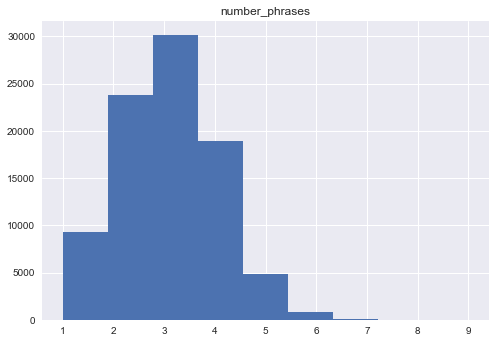

In [110]:
mez_c.hist(column = 'number_phrases', bins = (mez_c['number_phrases'].max()))
plt.show()

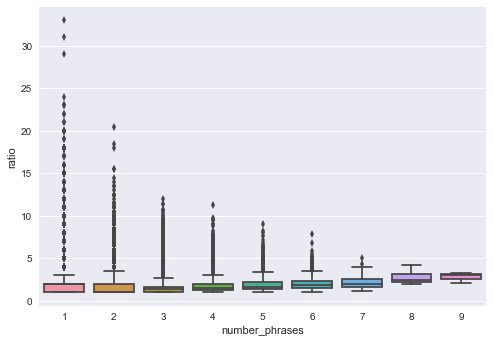

In [111]:
sns.boxplot(x='number_phrases', y='ratio', data=mez_c)
plt.show()

In [112]:
print(pearsonr(mez_c.number_phrases,mez_c.ratio))

print(np.corrcoef(mez_c.number_phrases,mez_c.ratio))

(-0.04831680856132961, 1.2085221080369431e-46)
[[ 1.         -0.04831681]
 [-0.04831681  1.        ]]


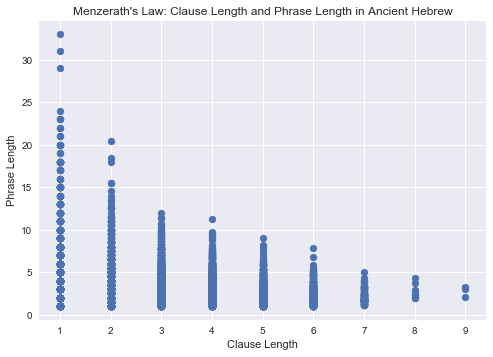

In [113]:
plt.scatter(mez_c.number_phrases,mez_c.ratio)
plt.title("Menzerath's Law: Clause Length and Phrase Length in Ancient Hebrew")
plt.xlabel("Clause Length")
plt.ylabel("Phrase Length")
plt.show()

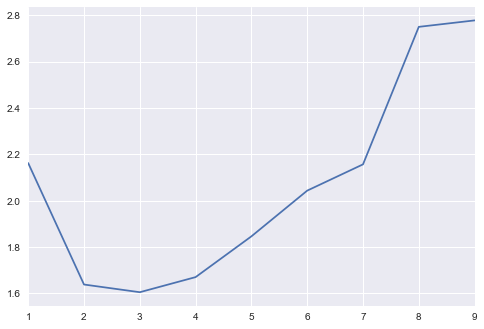

In [114]:
mez_c.ratio.groupby(number_phrases).mean().plot(kind='line')
plt.show()

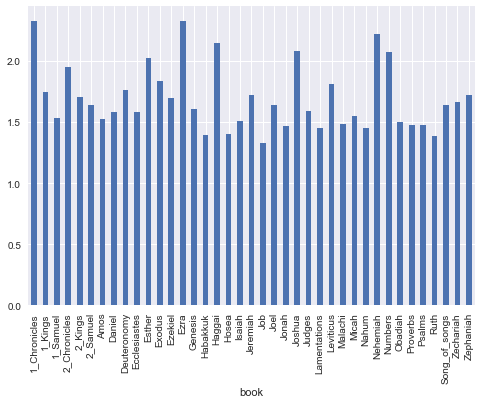

In [115]:
mez_c.ratio.groupby(mez_c.book).mean().plot(kind='bar')
plt.show()

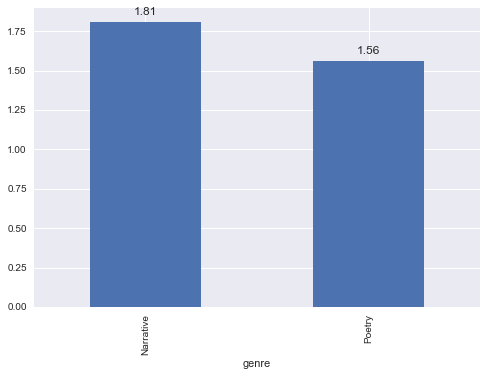

In [120]:
ax1 = mez_c.ratio.groupby(mez_c.genre).mean().plot(kind='bar')
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

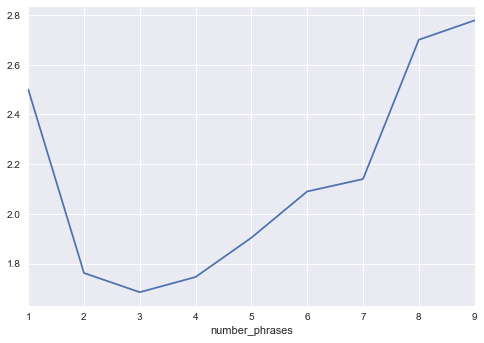

In [122]:
mez_c.loc[mez_c.genre == 'Narrative'].ratio.groupby(mez_c.number_phrases).mean().plot(kind='line')
plt.show()

In [123]:
print(pearsonr(mez_c.loc[mez_c.genre == 'Narrative'].number_phrases, mez_c.loc[mez_c.genre == 'Narrative'].ratio))

print(np.corrcoef(mez_c.loc[mez_c.genre == 'Narrative'].number_phrases, mez_c.loc[mez_c.genre == 'Narrative'].ratio))

(-0.06520530116889997, 9.420795377193843e-50)
[[ 1.        -0.0652053]
 [-0.0652053  1.       ]]


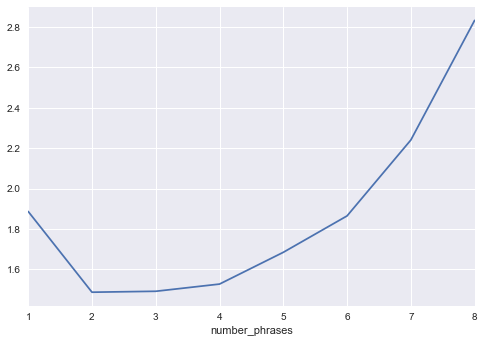

In [124]:
mez_c.loc[mez_c.genre == 'Poetry'].ratio.groupby(mez_c.number_phrases).mean().plot(kind='line')
plt.show()

In [125]:
print(pearsonr(mez_c.loc[mez_c.genre == 'Poetry'].number_phrases, mez_c.loc[mez_c.genre == 'Poetry'].ratio))

print(np.corrcoef(mez_c.loc[mez_c.genre == 'Poetry'].number_phrases, mez_c.loc[mez_c.genre == 'Poetry'].ratio))

(-0.06685112846940978, 2.563379324568555e-37)
[[ 1.         -0.06685113]
 [-0.06685113  1.        ]]
